# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dv_2016 = pd.read_csv('/content/domestic_visitors_2016.csv')
dv_2017 = pd.read_csv('/content/domestic_visitors_2017.csv')
dv_2018 = pd.read_csv('/content/domestic_visitors_2018.csv')
dv_2019 = pd.read_csv('/content/domestic_visitors_2019.csv')

In [3]:
fv_2016 = pd.read_csv('/content/foreign_visitors_2016.csv')
fv_2017 = pd.read_csv('/content/foreign_visitors_2017.csv')
fv_2018 = pd.read_csv('/content/foreign_visitors_2018.csv')
fv_2019 = pd.read_csv('/content/foreign_visitors_2019.csv')

# **Concatenating the domestic data sets by following its date**

In [4]:
domestic = [dv_2016,dv_2017,dv_2018,dv_2019]

df1 = pd.concat(domestic)

In [5]:
df1.tail(10)

,district,date,month,year,visitors
386,Yadadri Bhongir,01-03-2019,March,2019,481923
387,Yadadri Bhongir,01-04-2019,April,2019,441150
388,Yadadri Bhongir,01-05-2019,May,2019,345790
389,Yadadri Bhongir,01-06-2019,June,2019,370566
390,Yadadri Bhongir,01-07-2019,July,2019,332770
391,Yadadri Bhongir,01-08-2019,August,2019,389010
392,Yadadri Bhongir,01-09-2019,September,2019,366862
393,Yadadri Bhongir,01-10-2019,October,2019,381860
394,Yadadri Bhongir,01-11-2019,November,2019,365990
395,Yadadri Bhongir,01-12-2019,December,2019,477635


In [6]:
df1 = df1.reset_index()

In [7]:
df1

,index,district,date,month,year,visitors
0,0,Adilabad,01-01-2016,January,2016,792136
1,1,Adilabad,01-02-2016,February,2016,937820
2,2,Adilabad,01-03-2016,March,2016,582946
3,3,Adilabad,01-04-2016,April,2016,341948
4,4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...,...
1507,391,Yadadri Bhongir,01-08-2019,August,2019,389010
1508,392,Yadadri Bhongir,01-09-2019,September,2019,366862
1509,393,Yadadri Bhongir,01-10-2019,October,2019,381860
1510,394,Yadadri Bhongir,01-11-2019,November,2019,365990


In [8]:
df1.drop('index',axis = 1,inplace = True)

# **Concatenating the foreign data sets by following its date**

In [9]:
foreign = [fv_2016,fv_2017,fv_2018,fv_2019]

df2 = pd.concat(foreign)
df_foreign =df2

In [10]:
df2.tail(10)

,district,date,month,year,visitors
386,Yadadri Bhongir,01-03-2019,March,2019,0
387,Yadadri Bhongir,01-04-2019,April,2019,0
388,Yadadri Bhongir,01-05-2019,May,2019,0
389,Yadadri Bhongir,01-06-2019,June,2019,0
390,Yadadri Bhongir,01-07-2019,July,2019,0
391,Yadadri Bhongir,01-08-2019,August,2019,0
392,Yadadri Bhongir,01-09-2019,September,2019,0
393,Yadadri Bhongir,01-10-2019,October,2019,0
394,Yadadri Bhongir,01-11-2019,November,2019,0
395,Yadadri Bhongir,01-12-2019,December,2019,0


In [11]:
df2 = df2.reset_index()

In [12]:
df2.drop('index',axis = 1,inplace =True )

In [13]:
df1.shape

(1512, 5)

In [14]:
df2.shape

(1512, 5)

# **Checking null values**

In [15]:
df1.isnull().sum()

district     0
date         0
month        0
year         0
visitors    30
dtype: int64

In [16]:
#df1 = df1.fillna(0)

In [17]:
df2.isnull().sum()

district    0
date        0
month       0
year        0
visitors    0
dtype: int64

# **Droping duplicates**

In [18]:
df1 = df1.drop_duplicates()

In [19]:
df2 = df2.drop_duplicates()

In [20]:
df1.dtypes

district    object
date        object
month       object
year         int64
visitors    object
dtype: object

In [21]:
df1['visitors'] = df1['visitors'].fillna(0)

In [22]:
df1['visitors'] = df1['visitors'].replace('[^0-9]+', '0', regex=True)

In [23]:
df1['visitors'] = df1['visitors'].astype(int)

In [24]:
df1['date'] = pd.to_datetime(df1['date'])

In [25]:
df1['year'] = df1['year'].astype(int)

In [26]:
df1['month'].value_counts()

January      126
February     126
March        126
April        126
May          126
June         126
July         126
August       126
September    126
October      126
November     126
December     126
Name: month, dtype: int64

In [27]:
df2.dtypes

district    object
date        object
month       object
year         int64
visitors    object
dtype: object

In [28]:
df2['visitors'] = df2['visitors'].fillna(0)

In [29]:
df2['visitors'] = df2['visitors'].replace('[^0-9]+', '0', regex=True)

In [30]:
df2['visitors'] = df2['visitors'].astype(int)

In [31]:
df2['date'] = pd.to_datetime(df2['date'])

In [32]:
df2['year'] = df2['year'].astype(int)

# **(Domestic)Top 10 districts that are highest number of vistors in year(2016-2019)**

<Axes: ylabel='district'>

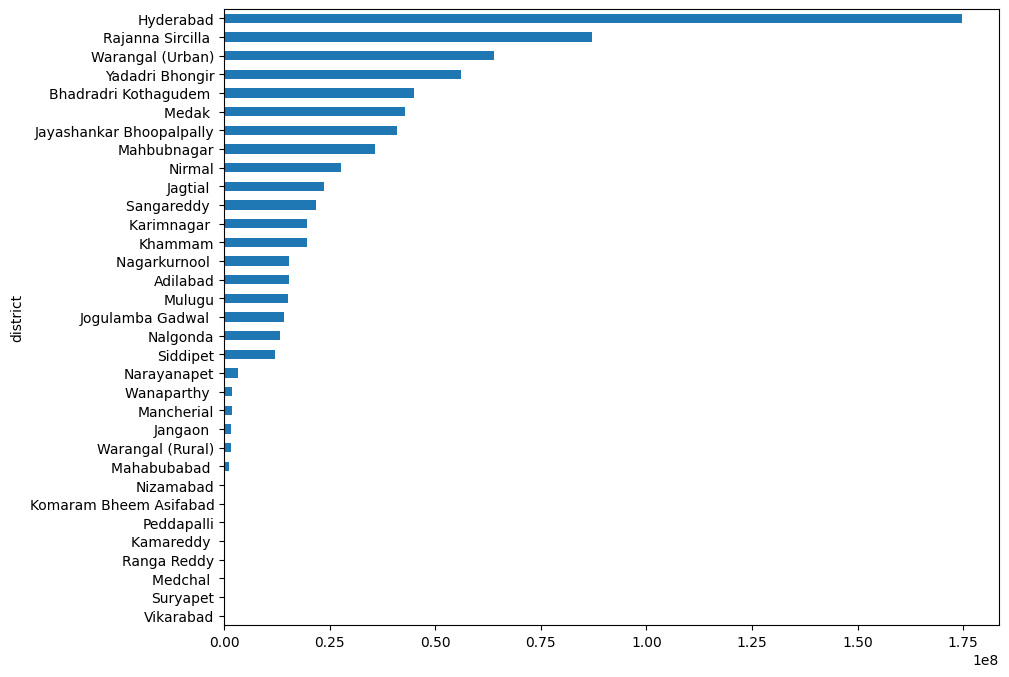

In [33]:
plt.figure(figsize=(10,8))
(df1.groupby('district')['visitors'].mean()*100).sort_values().plot(kind = 'barh')

# **Top 10 districts by Domestics visitors**

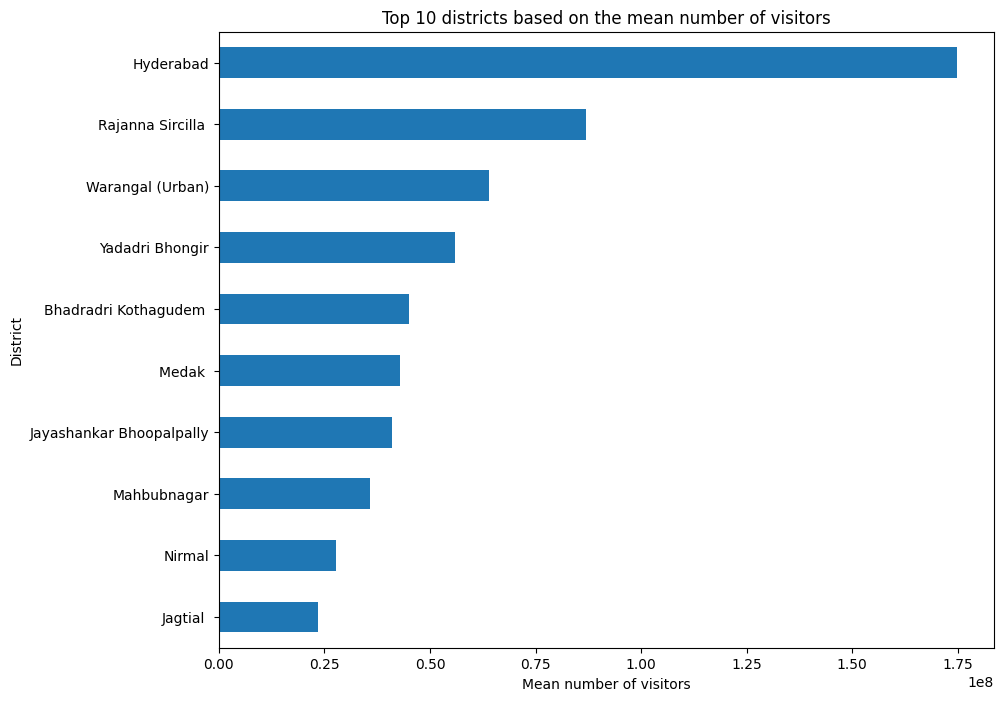

In [34]:
plt.figure(figsize=(10,8))
(df1.groupby('district')['visitors'].mean()*100).sort_values().tail(10).plot(kind = 'barh')
plt.title('Top 10 districts based on the mean number of visitors')
plt.xlabel('Mean number of visitors')
plt.ylabel('District')
plt.show()

# **Top 3 districts based on compounded annual growth**

In [35]:
df_filtered = df1[(df1['year'] >= 2016) & (df1['year'] <= 2019)]

# calculate the CAGR for each district
df_cagr = df_filtered.groupby('district').apply(lambda x: (x['visitors'].iloc[-1]/x['visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')

# sort the districts by CAGR in descending order
top_districts = df_cagr.sort_values('CAGR', ascending=False)['district'].head(3).tolist()


<ipython-input-35-7acdf794c98c>:4: RuntimeWarning: divide by zero encountered in long_scalars
  df_cagr = df_filtered.groupby('district').apply(lambda x: (x['visitors'].iloc[-1]/x['visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')
<ipython-input-35-7acdf794c98c>:4: RuntimeWarning: invalid value encountered in long_scalars
  df_cagr = df_filtered.groupby('district').apply(lambda x: (x['visitors'].iloc[-1]/x['visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')


<Axes: ylabel='count'>

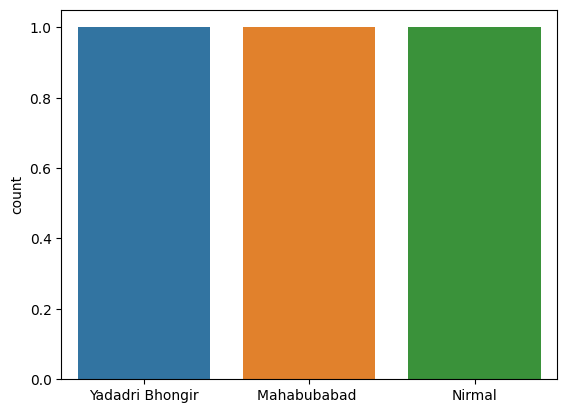

In [36]:
sns.countplot(data = df1,x = top_districts)

# ****Bottom 3 districts based on compounded annual growth****

In [37]:
df_filtered = df1[(df1['year'] >= 2016) & (df1['year'] <= 2019)]

# calculate the CAGR for each district
df_cagr = df_filtered.groupby('district').apply(lambda x: (x['visitors'].iloc[-1]/x['visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')

# sort the districts by CAGR in descending order
bottom_districts = df_cagr.sort_values('CAGR', ascending=True)['district'].head(3).tolist()

<ipython-input-37-d004e7ea8578>:4: RuntimeWarning: divide by zero encountered in long_scalars
  df_cagr = df_filtered.groupby('district').apply(lambda x: (x['visitors'].iloc[-1]/x['visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')
<ipython-input-37-d004e7ea8578>:4: RuntimeWarning: invalid value encountered in long_scalars
  df_cagr = df_filtered.groupby('district').apply(lambda x: (x['visitors'].iloc[-1]/x['visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')


<Axes: ylabel='count'>

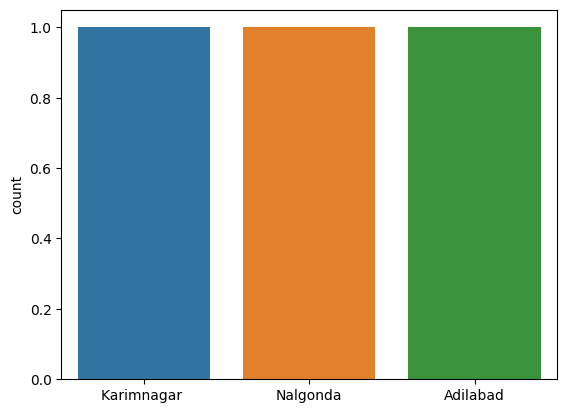

In [38]:
sns.countplot(data = df1,x = bottom_districts)

# **highest visitors based on months from (2016 to 2019)**

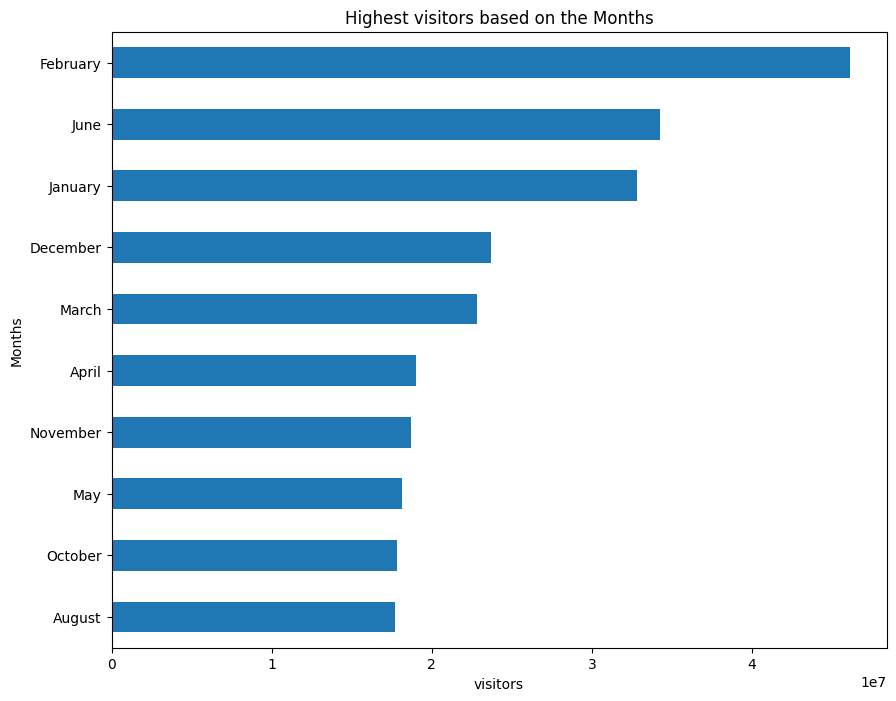

In [39]:
plt.figure(figsize=(10,8))
(df1.groupby('month')['visitors'].mean()*100).sort_values().tail(10).plot(kind = 'barh')
plt.title('Highest visitors based on the Months')
plt.xlabel('visitors')
plt.ylabel('Months')
plt.show()

In [40]:
# Filter the data for Hyderabad district
hyderabad = df1[df1['district'] == 'Hyderabad']


# **highest visitors of (Hyderabad) based on months from (2016 to 2019)**

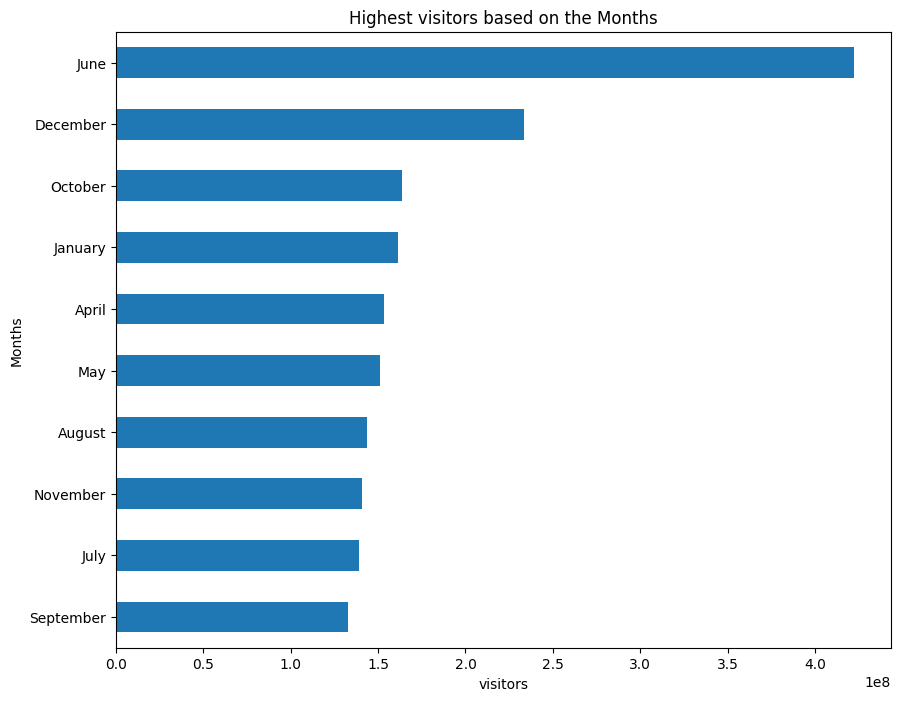

In [41]:
plt.figure(figsize=(10,8))
(hyderabad.groupby('month')['visitors'].mean()*100).sort_values().tail(10).plot(kind = 'barh')
plt.title('Highest visitors based on the Months')
plt.xlabel('visitors')
plt.ylabel('Months')
plt.show()

# **1.The peak month is june in every year were most visitors of domestics public are coming**
# **2.The low season month is September in every year were low visitors of domestics public are coming****

In [42]:
df2.head(10)

,district,date,month,year,visitors
0,Adilabad,2016-01-01,January,2016,2
1,Adilabad,2016-01-02,February,2016,0
2,Adilabad,2016-01-03,March,2016,2
3,Adilabad,2016-01-04,April,2016,0
4,Adilabad,2016-01-05,May,2016,0
5,Adilabad,2016-01-06,June,2016,0
6,Adilabad,2016-01-07,July,2016,4
7,Adilabad,2016-01-08,August,2016,2
8,Adilabad,2016-01-09,September,2016,0
9,Adilabad,2016-01-10,October,2016,0


In [43]:
df2.dtypes

district            object
date        datetime64[ns]
month               object
year                 int64
visitors             int64
dtype: object

In [44]:
df2.columns = ['foreign_district', 'foreign_date', 'foreign_month','foreign_year','foreign_visitors']

In [45]:
df2.head()

,foreign_district,foreign_date,foreign_month,foreign_year,foreign_visitors
0,Adilabad,2016-01-01,January,2016,2
1,Adilabad,2016-01-02,February,2016,0
2,Adilabad,2016-01-03,March,2016,2
3,Adilabad,2016-01-04,April,2016,0
4,Adilabad,2016-01-05,May,2016,0


# **Highest Number of foreign_visitors visiting to Telangana based on year wise**

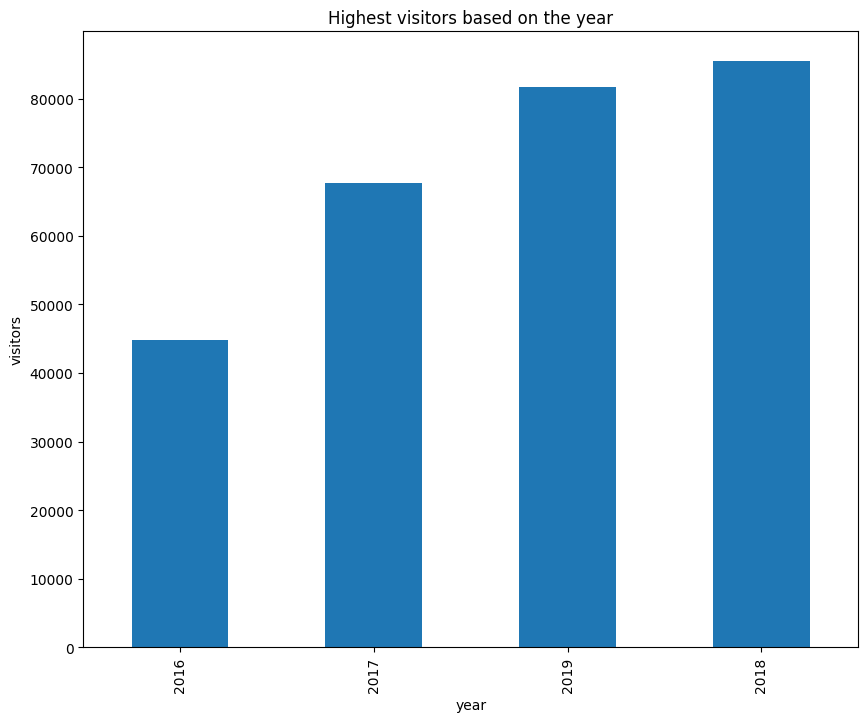

In [46]:
plt.figure(figsize=(10,8))
(df2.groupby('foreign_year')['foreign_visitors'].mean()*100).sort_values().plot(kind = 'bar')
plt.title('Highest visitors based on the year')
plt.xlabel('year')
plt.ylabel('visitors')
plt.show()

# **Highest Number of foreign_visitors visiting to Telangana based on month wise**

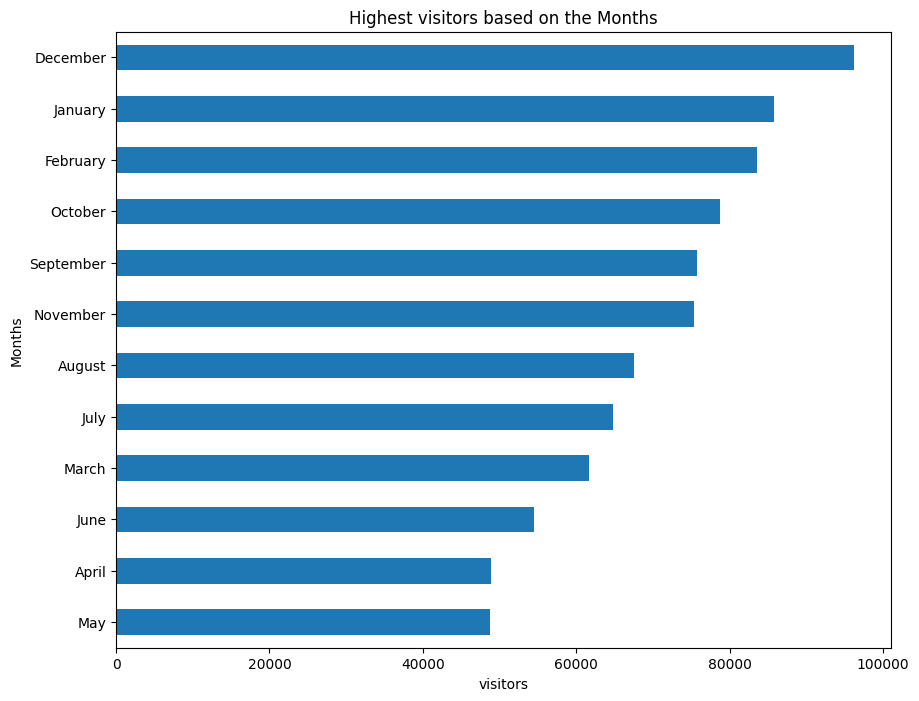

In [47]:
plt.figure(figsize=(10,8))
(df2.groupby('foreign_month')['foreign_visitors'].mean()*100).sort_values().plot(kind = 'barh')
plt.title('Highest visitors based on the Months')
plt.xlabel('visitors')
plt.ylabel('Months')
plt.show()

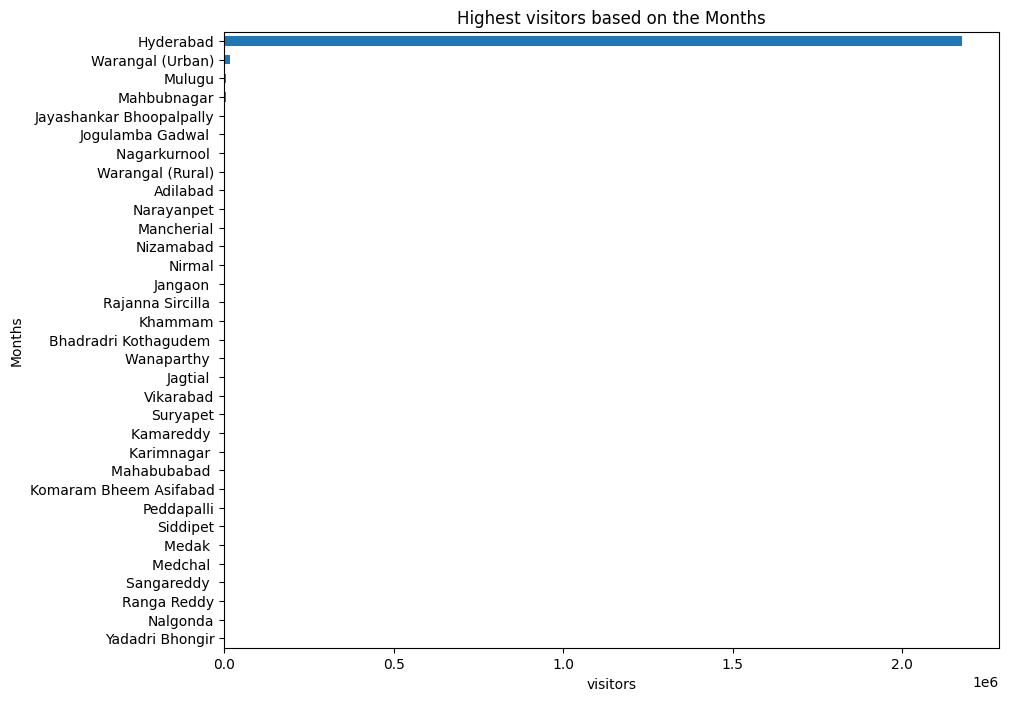

In [48]:
plt.figure(figsize=(10,8))
(df2.groupby('foreign_district')['foreign_visitors'].mean()*100).sort_values().plot(kind = 'barh')
plt.title('Highest visitors based on the Months')
plt.xlabel('visitors')
plt.ylabel('Months')
plt.show()

# **Top 3 districts of highest visitors**

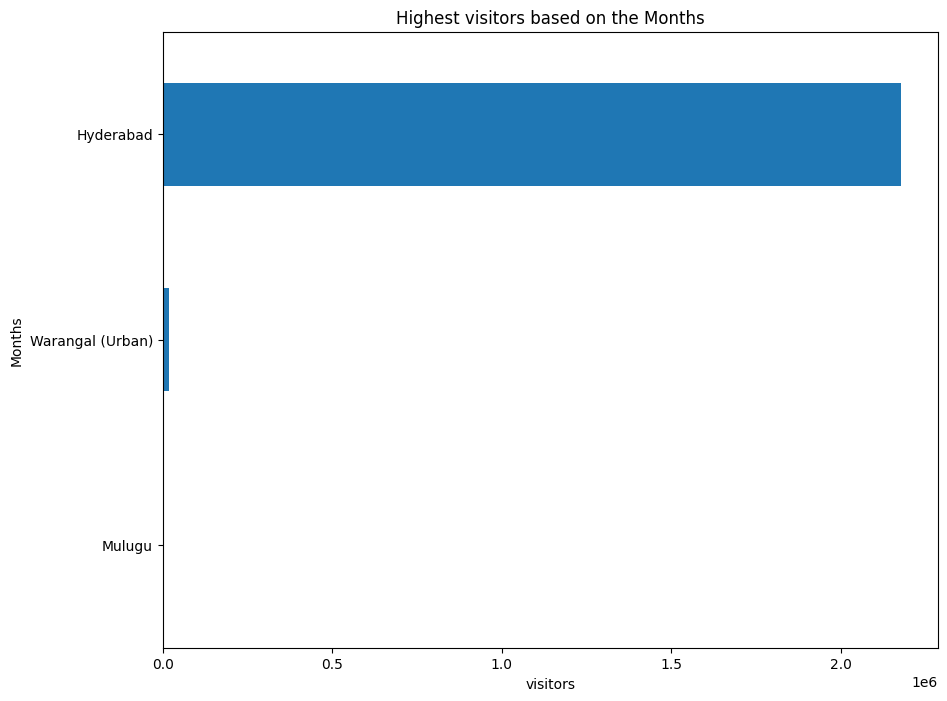

In [49]:
plt.figure(figsize=(10,8))
(df2.groupby('foreign_district')['foreign_visitors'].mean()*100).sort_values().tail(3).plot(kind = 'barh')
plt.title('Highest visitors based on the Months')
plt.xlabel('visitors')
plt.ylabel('Months')
plt.show()

# **Bottom 3 districts of highest visitors** 

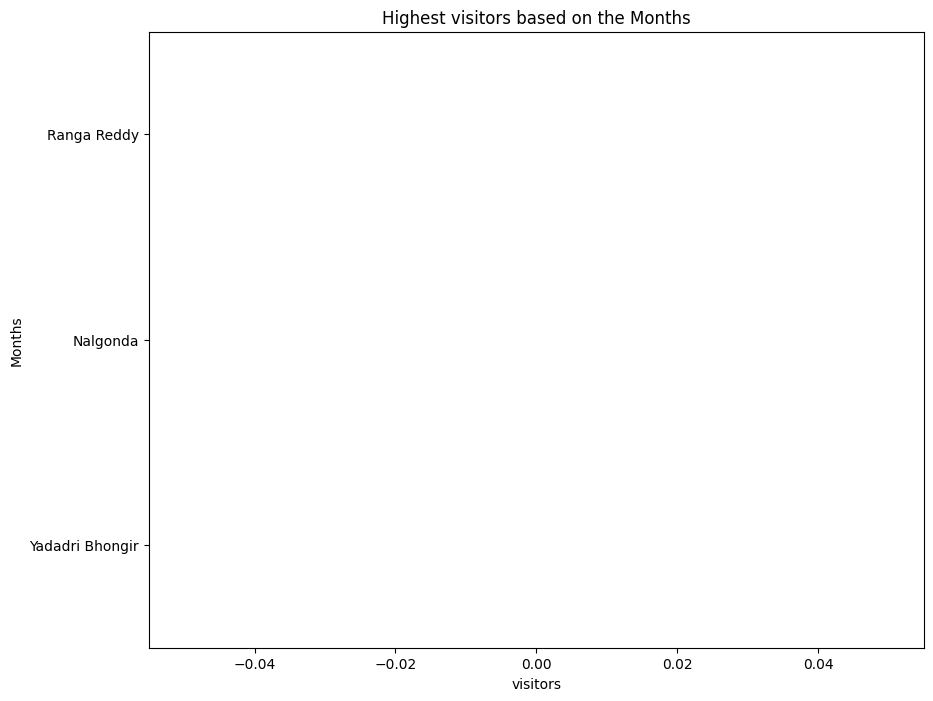

In [50]:
plt.figure(figsize=(10,8))
(df2.groupby('foreign_district')['foreign_visitors'].mean()*100).sort_values().head(3).plot(kind = 'barh')
plt.title('Highest visitors based on the Months')
plt.xlabel('visitors')
plt.ylabel('Months')
plt.show()

In [51]:
'''df_filtered = df2[(df2['foreign_year'] >= 2016) & (df2['foreign_year'] <= 2019)]

# calculate the CAGR for each district
df_cagr = df_filtered.groupby('foreign_district').apply(lambda x: (x['foreign_visitors'].iloc[-1]/x['foreign_visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')

# sort the districts by CAGR in descending order
bottom_districts_f= df_cagr.sort_values('CAGR', ascending=True)['foreign_district'].head(3).tolist()
sns.countplot(data = df1,x = bottom_districts_f)'''

"df_filtered = df2[(df2['foreign_year'] >= 2016) & (df2['foreign_year'] <= 2019)]\n\n# calculate the CAGR for each district\ndf_cagr = df_filtered.groupby('foreign_district').apply(lambda x: (x['foreign_visitors'].iloc[-1]/x['foreign_visitors'].iloc[0])**(1/4) - 1).reset_index(name='CAGR')\n\n# sort the districts by CAGR in descending order\nbottom_districts_f= df_cagr.sort_values('CAGR', ascending=True)['foreign_district'].head(3).tolist()\nsns.countplot(data = df1,x = bottom_districts_f)"

In [53]:
data = df2

In [54]:
data

,foreign_district,foreign_date,foreign_month,foreign_year,foreign_visitors
0,Adilabad,2016-01-01,January,2016,2
1,Adilabad,2016-01-02,February,2016,0
2,Adilabad,2016-01-03,March,2016,2
3,Adilabad,2016-01-04,April,2016,0
4,Adilabad,2016-01-05,May,2016,0
...,...,...,...,...,...
1507,Yadadri Bhongir,2019-01-08,August,2019,0
1508,Yadadri Bhongir,2019-01-09,September,2019,0
1509,Yadadri Bhongir,2019-01-10,October,2019,0
1510,Yadadri Bhongir,2019-01-11,November,2019,0


# **Projected number of foreign visitors in Hyderabad in year 2025**

In [55]:
# Select only Hyderabad data
hyd_data = data[data['foreign_district'] == 'Hyderabad']

# Calculate growth rate for visitors
hyd_data['foreign_growth_rate'] = hyd_data['foreign_visitors'].pct_change()

# Drop the first row since it doesn't have a growth rate
hyd_data = hyd_data.iloc[1:]


<ipython-input-55-ddcd6ae1f6fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hyd_data['foreign_growth_rate'] = hyd_data['foreign_visitors'].pct_change()


In [58]:
hyd_data.head()

,foreign_district,foreign_date,foreign_month,foreign_year,foreign_visitors,foreign_growth_rate
25,Hyderabad,2016-01-02,February,2016,29646,0.868642
26,Hyderabad,2016-01-03,March,2016,13019,-0.560851
27,Hyderabad,2016-01-04,April,2016,8402,-0.354636
28,Hyderabad,2016-01-05,May,2016,8522,0.014282
29,Hyderabad,2016-01-06,June,2016,10284,0.206759


In [ ]:
#Projected_visitors = Current_visitors * (1 + Growth rate) ^ Years

In [61]:
# Define growth rates
foreign_growth_rate = hyd_data['foreign_growth_rate'].mean()

# Define current number of visitors
current_foreign = hyd_data.loc[hyd_data['foreign_year'] == 2019, 'foreign_visitors'].iloc[0]

# Define number of years
years = 6

# Calculate projected number of visitors
projected_foreign = current_foreign * (1 + foreign_growth_rate) * years

# Print projected numbers
print('Projected number of foreign visitors in Hyderabad in 2025:', round(projected_foreign))


Projected number of foreign visitors in Hyderabad in 2025: 230443


# **The estimating the revenue of Hyderabad in 2025 of each tourist spend average amount average amt(5600)**

In [65]:
print('The average spend of each foreign tourist is :',round(projected_foreign*5600))

The average spend of each foreign tourist is : 1290479669
